# Estudyante Blues

**GOAL**: To get accurate prediction of student grades using machine learning algorithms and the factors that influence them.


In [71]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import seaborn as sns
sns.set_theme(style="darkgrid")

### Explore data with NumPy

In [72]:
data = [50,50,47,97,49,3,53,42,26,74,82,62,37,15,70,27,36,35,48,52,63,64]
print(data)

[50, 50, 47, 97, 49, 3, 53, 42, 26, 74, 82, 62, 37, 15, 70, 27, 36, 35, 48, 52, 63, 64]


In [73]:
grades = np.array(data)
print(grades)

[50 50 47 97 49  3 53 42 26 74 82 62 37 15 70 27 36 35 48 52 63 64]


In [74]:
print(type(data), 'x 2:', data * 2)
print('---')
print(type(grades), 'x 2:', grades * 2)


<class 'list'> x 2: [50, 50, 47, 97, 49, 3, 53, 42, 26, 74, 82, 62, 37, 15, 70, 27, 36, 35, 48, 52, 63, 64, 50, 50, 47, 97, 49, 3, 53, 42, 26, 74, 82, 62, 37, 15, 70, 27, 36, 35, 48, 52, 63, 64]
---
<class 'numpy.ndarray'> x 2: [100 100  94 194  98   6 106  84  52 148 164 124  74  30 140  54  72  70
  96 104 126 128]


In [75]:
grades.shape

(22,)

In [76]:
grades[0]

50

In [77]:
grades.mean()

49.18181818181818

In [78]:
study_hours = [10.0,11.5,9.0,16.0,9.25,12.0,11.5,9.0,8.5,14.5,15.5,
               13.75,9.0,8.0,15.5,8.0,9.0,6.0,10.0,12.0,12.5,1.0]

student_data = np.array([study_hours,grades])

student_data

array([[10.  , 11.5 ,  9.  , 16.  ,  9.25, 12.  , 11.5 ,  9.  ,  8.5 ,
        14.5 , 15.5 , 13.75,  9.  ,  8.  , 15.5 ,  8.  ,  9.  ,  6.  ,
        10.  , 12.  , 12.5 ,  1.  ],
       [50.  , 50.  , 47.  , 97.  , 49.  ,  3.  , 53.  , 42.  , 26.  ,
        74.  , 82.  , 62.  , 37.  , 15.  , 70.  , 27.  , 36.  , 35.  ,
        48.  , 52.  , 63.  , 64.  ]])

In [79]:
student_data.shape

(2, 22)

In [80]:
student_data[0][0]

10.0

In [81]:
# Get the mean value of each sub-array
avg_study = student_data[0].mean()
avg_grade = student_data[1].mean()

print("Average Mean Value\n")
print("Study hours: {:.2f}\nGrade: {:.2f}".format(avg_study,avg_grade))

Average Mean Value

Study hours: 10.52
Grade: 49.18


## Exploring data with Pandas

In [82]:
students_df = pd.DataFrame(
        {'Name': [
        'Jeric',
        'Joei',
        'Leah',
        'Venice',
        'Rosie',
        'Jobell',
        'Christian',
        'Chrizzie',
        'Rhonda',
        'JanPal',
        'Melling',
        'Jaime',
        'Toni',
        'Syne',
        'Jenny',
        'Bruce',
        'Helena',
        'Whang-od',
        'Anila',
        'Edgie',
        'Daniel',
        'DagBushet'
    ],
    "StudyHours": student_data[0],
    "Grade": student_data[1],
    }
)

students_df

,Name,StudyHours,Grade
0,Jeric,10.00,50.0
1,Joei,11.50,50.0
2,Leah,9.00,47.0
3,Venice,16.00,97.0
4,Rosie,9.25,49.0
5,Jobell,12.00,3.0
6,Christian,11.50,53.0
7,Chrizzie,9.00,42.0
8,Rhonda,8.50,26.0
9,JanPal,14.50,74.0


In [83]:
students_df.loc[5]

Name          Jobell
StudyHours      12.0
Grade            3.0
Name: 5, dtype: object

In [84]:
students_df.loc[0:5]

,Name,StudyHours,Grade
0,Jeric,10.00,50.0
1,Joei,11.50,50.0
2,Leah,9.00,47.0
3,Venice,16.00,97.0
4,Rosie,9.25,49.0
5,Jobell,12.00,3.0


In [85]:
students_df.iloc[0:5]

,Name,StudyHours,Grade
0,Jeric,10.00,50.0
1,Joei,11.50,50.0
2,Leah,9.00,47.0
3,Venice,16.00,97.0
4,Rosie,9.25,49.0


In [86]:
# Data from 1 column and 2nd row
students_df.iloc[1,[1,2]]

StudyHours    11.5
Grade         50.0
Name: 1, dtype: object

In [87]:
students_df.loc[3,'Grade']

97.0

In [88]:
students_df.loc[students_df['Name']=='Whang-od']

,Name,StudyHours,Grade
17,Whang-od,6.0,35.0


In [89]:
students_df.query('Name=="DagBushet"')

,Name,StudyHours,Grade
21,DagBushet,1.0,64.0


In [90]:
students_df[students_df.Name == 'Whang-od']

,Name,StudyHours,Grade
17,Whang-od,6.0,35.0


### Load DataFrame from a file

In [96]:
students_df = pd.read_csv('./data/students_data.csv', delimiter=',', header='infer')

students_df.head()

,Name,StudyHours,Grade
0,Jeric,10.00,50.0
1,Joei,11.50,50.0
2,Leah,9.00,47.0
3,Venice,16.00,97.0
4,Rosie,9.25,49.0


In [93]:
students_df.describe()

,StudyHours,Grade
count,22.000000,22.000000
mean,10.522727,49.181818
std,3.487144,21.737912
min,1.000000,3.000000
25%,9.000000,36.250000
50%,10.000000,49.500000
75%,12.375000,62.750000
max,16.000000,97.000000


In [97]:
students_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        22 non-null     object 
 1   StudyHours  22 non-null     float64
 2   Grade       22 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.8 KB


### Handling missing values

In [98]:
students_df.isnull()

,Name,StudyHours,Grade
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [99]:
students_df.isnull().sum()

Name          0
StudyHours    0
Grade         0
dtype: int64

## Explore data in the DataFrame

Getting the mean average weekly study hours and grade

In [101]:
mean_study = students_df['StudyHours'].mean()
mean_grade = students_df.Grade.mean()

print("Avg. weekly study hours: {:.2f}\nAvg. grade: {:.2f}".format(mean_study,mean_grade))

Avg. weekly study hours: 10.52
Avg. grade: 49.18


In [102]:
# Find students who studied the average or more hours.
students_df[students_df.StudyHours > mean_study]

,Name,StudyHours,Grade
1,Joei,11.50,50.0
3,Venice,16.00,97.0
5,Jobell,12.00,3.0
6,Christian,11.50,53.0
9,JanPal,14.50,74.0
10,Melling,15.50,82.0
11,Jaime,13.75,62.0
14,Jenny,15.50,70.0
19,Edgie,12.00,52.0
20,Daniel,12.50,63.0


In [104]:
# Calculate the mean average grade based on results above.
students_df[students_df.StudyHours > mean_study].Grade.mean()

60.6

In [105]:
# Pass/Fail

passes = pd.Series(students_df['Grade'] >= 60)
students_df = pd.concat([students_df, passes.rename("Pass")], axis=1)

students_df

,Name,StudyHours,Grade,Pass
0,Jeric,10.00,50.0,False
1,Joei,11.50,50.0,False
2,Leah,9.00,47.0,False
3,Venice,16.00,97.0,True
4,Rosie,9.25,49.0,False
5,Jobell,12.00,3.0,False
6,Christian,11.50,53.0,False
7,Chrizzie,9.00,42.0,False
8,Rhonda,8.50,26.0,False
9,JanPal,14.50,74.0,True


In [106]:
print(students_df.groupby(students_df.Pass).Name.count())

Pass
False    15
True      7
Name: Name, dtype: int64


In [114]:
# result = students_df.groupby('Pass')[['StudyHours', 'Grade']].mean()
# print(result)
print(students_df.groupby('Pass')[['StudyHours', 'Grade']].mean())


       StudyHours      Grade
Pass                        
False    9.516667  38.000000
True    12.678571  73.142857


## Visualizing data

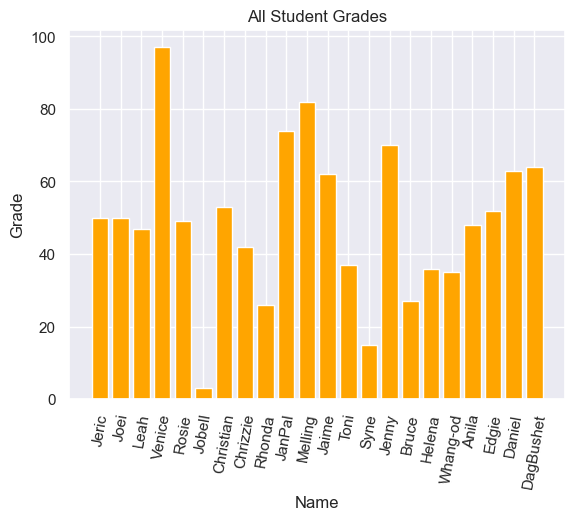

In [127]:
plt.bar(x=students_df.Name, height=students_df.Grade, color='orange')

plt.title('All Student Grades')
plt.xlabel('Name')
plt.ylabel('Grade')
plt.xticks(rotation=80)
plt.show()

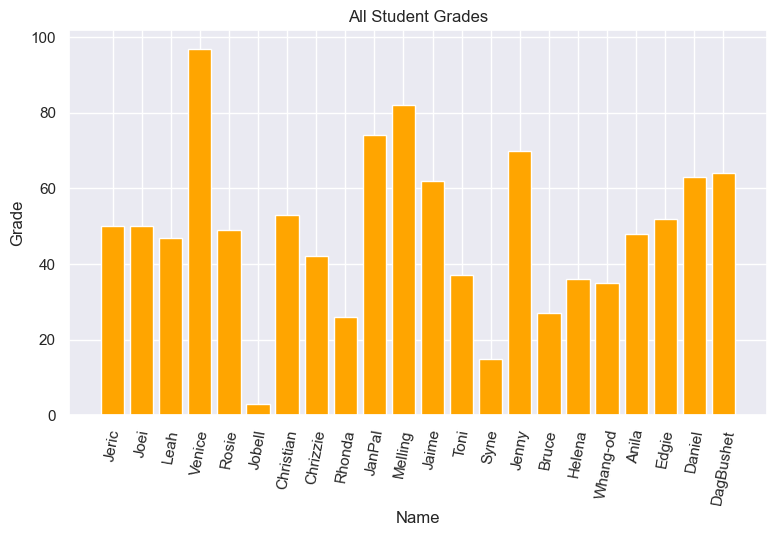

In [128]:
fig = plt.figure(figsize=(9,5))

plt.bar(x=students_df.Name, height=students_df.Grade, color='orange')
plt.title('All Student Grades')
plt.xlabel('Name')
plt.ylabel('Grade')
plt.xticks(rotation=80)
plt.show()

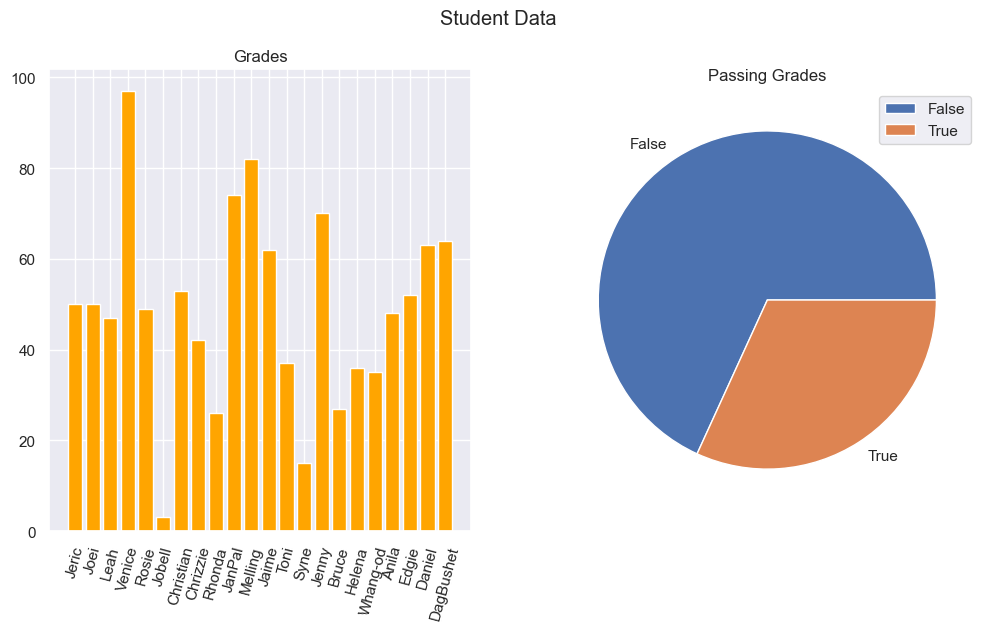

In [131]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot Grades
ax[0].bar(x=students_df.Name, height=students_df.Grade, color='orange')
ax[0].set_title("Grades")
ax[0].tick_params(axis='x', rotation=75) 

# Plot Passing Grades
pass_counts = students_df['Pass'].value_counts()
ax[1].pie(pass_counts, labels=pass_counts.index)
ax[1].set_title('Passing Grades')

# Set legend
ax[1].legend(pass_counts.index.tolist())

# Set figure title
fig.suptitle('Student Data')

plt.show()


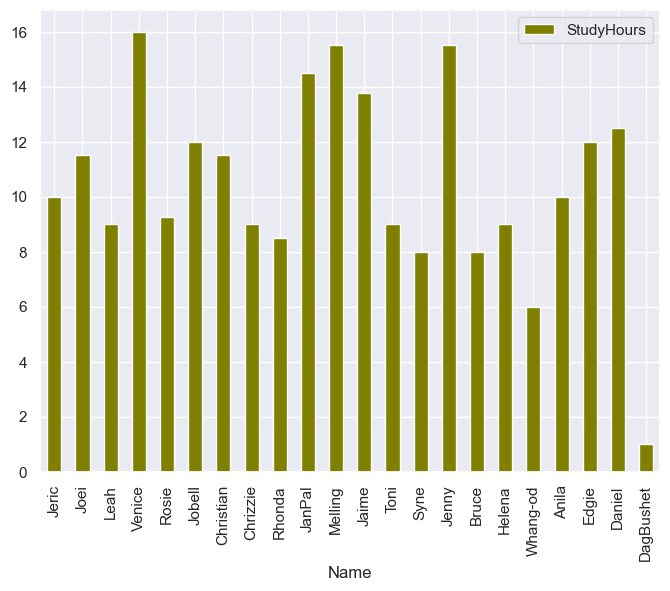

In [136]:
students_df.plot.bar(x='Name', y='StudyHours', color='olive', figsize=(8,6))
plt.show()

## Statistics

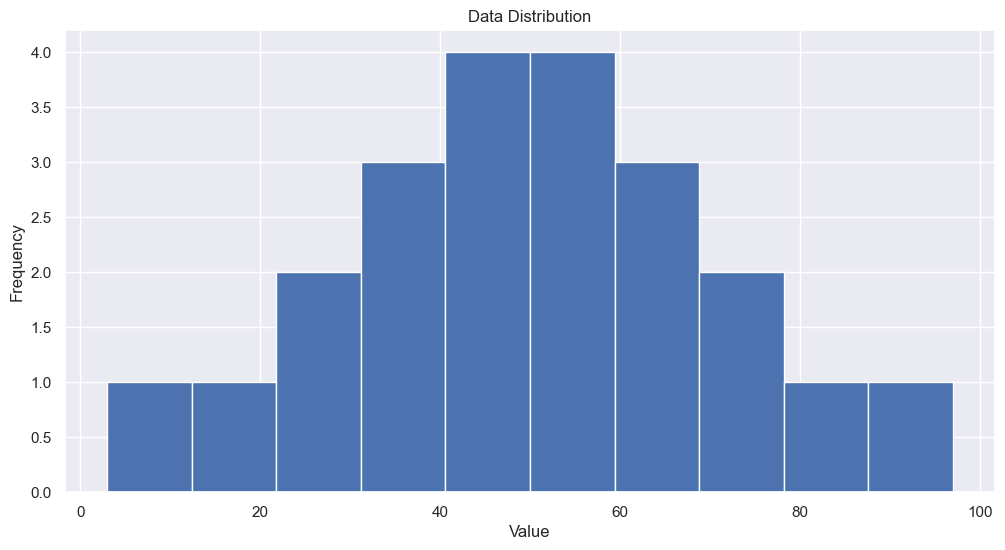

In [154]:
var_data = students_df['Grade']
fig = plt.figure(figsize=(12,6))

plt.hist(var_data)

plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()

Min:3.00
Mean:49.18
Median:49.50
Mode:50.00
Max:97.00



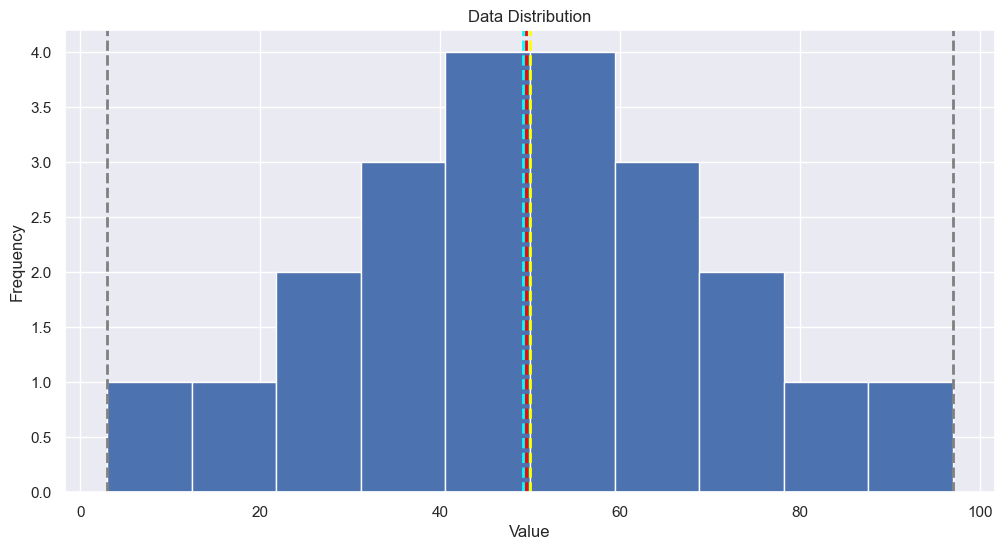

In [153]:
var_data = students_df['Grade']


min_val = var_data.min()
max_val = var_data.max()
mean_val = var_data.mean()
med_val = var_data.median()
mod_val = var_data.mode()[0]

print("Min:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMax:{:.2f}\n".format(min_val,mean_val,med_val,mod_val,max_val))

fig = plt.figure(figsize=(12,6))

plt.hist(var_data)

plt.axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
plt.axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
plt.axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
plt.axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
plt.axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()

Min:3.00
Mean:49.18
Median:49.50
Mode:50.00
Max:97.00



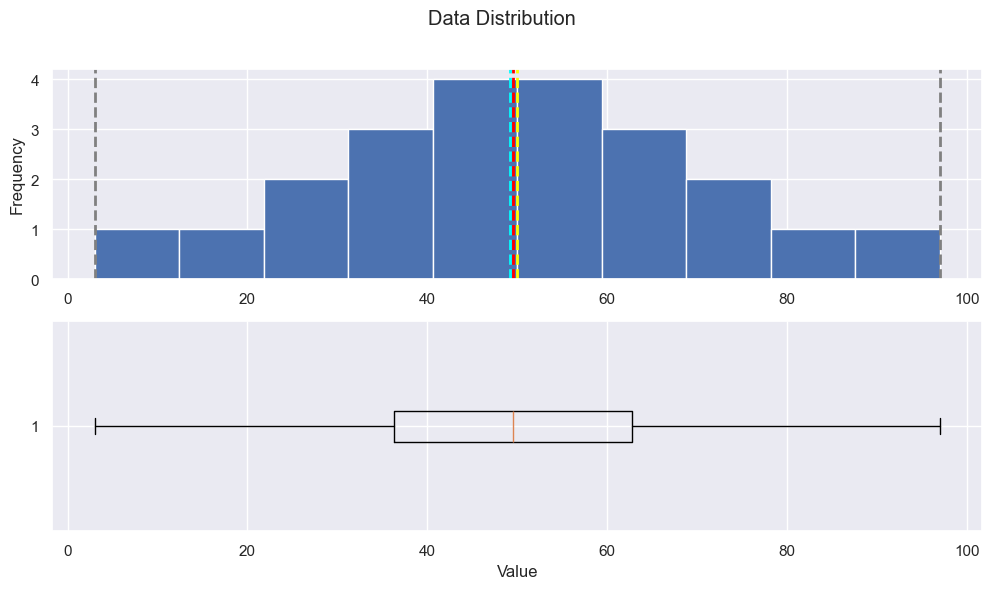

In [158]:
def show_distribution(var_data):

    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    fig, ax = plt.subplots(2,1,figsize=(12,6))

    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')    

    print("Min:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMax:{:.2f}\n".format(min_val,mean_val,med_val,mod_val,max_val))

col = students_df['Grade']

show_distribution(col)

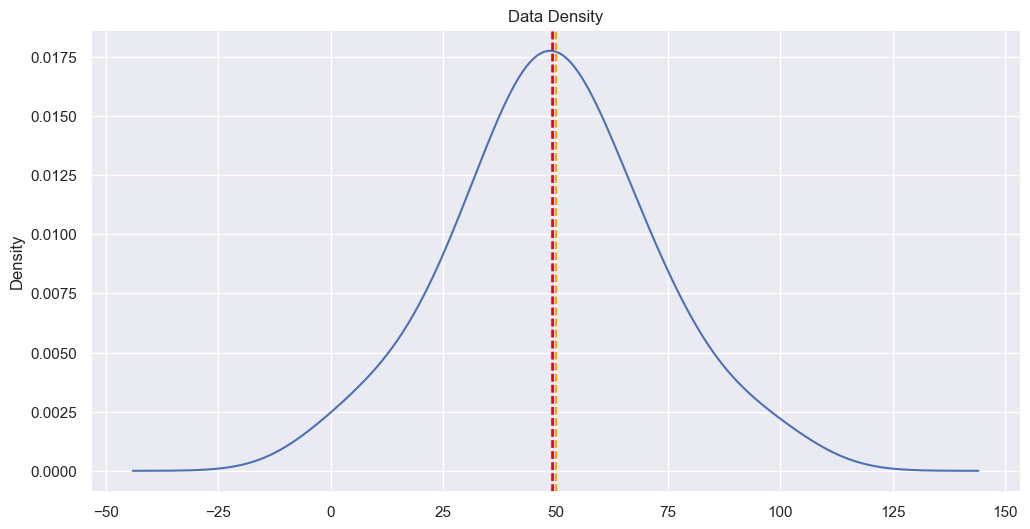

In [149]:
def show_density(var_data):

    fig = plt.figure(figsize=(12,6))

    var_data.plot.density()

    plt.axvline(x=var_data.mean(), color='magenta', linestyle='dashed')
    plt.axvline(x=var_data.median(), color='red', linestyle='dashed')
    plt.axvline(x=var_data.mode()[0], color='orange', linestyle='dashed')
    plt.title("Data Density")
    plt.show()

col = students_df['Grade']
show_density(col)

## Data Comparison

## Regression coefficients for prediction